How does the curvature (or neural trajectory itself) change when presenting the same stimulus?
In other words, how reliable are this trajectories and stimulus dependent? 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
%matplotlib inline
%load_ext autoreload
%autoreload 2

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)

from data.datasets import MovieSet
from curvature.curvature_schemas import CurvaturePixels, CurvatureResponse, TemporalFilter, SpatialRescale, CurvatureResponseSample, Seed, DimensionSample
from data import data_schemas as data
from utils.utils import get_trial_idx, type_object_movie
from utils.curvature import compute_curvature
from visualization.visualize import scatter_brain_areas, brain_area_curvature, histogram_object_types, scatter_pix_responses, view_frames, vis_pca_trajectory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data.InputResponse.Input() & dict(tier='test')

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,preproc_id preprocessing ID,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),trial_idx trial index within sessions,"tier whether the trail was for training, testing or validation"
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1831,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1853,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1875,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1878,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1894,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1912,test
16314,4,3,3,0imq6dCmY/ic4QL75aFW,1919,test


In [37]:
data.ConditionClip() & dict(condition_hash ='0imq6dCmY/ic4QL75aFW')

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),movie_name short movie title,clip_number clip index,skip_time (s) skip to this time in the clip,cut_after (s) cut clip if it is longer than this duration
0imq6dCmY/ic4QL75aFW,obj2v5,16,0.000,3.000


In [47]:
key = (data.InputResponse.Input() & dict(trial_idx = 1919)).fetch('KEY')
x   = data.InputResponse.Input().get_inputs(key) 

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


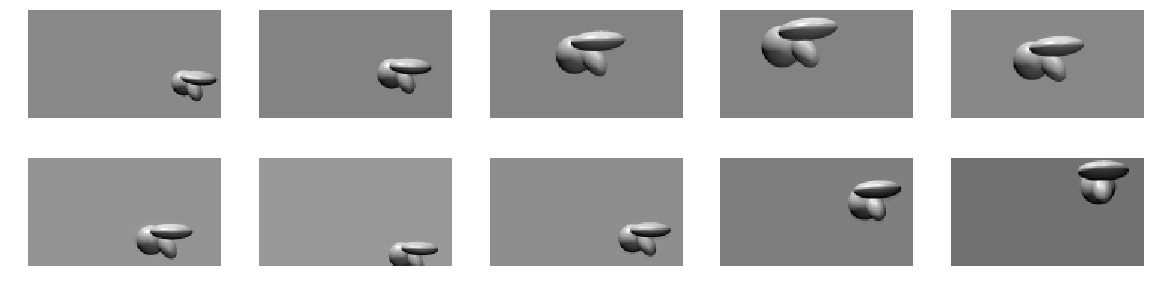

In [48]:
view_frames(x)

In [66]:
curvature = (CurvatureResponse * (TemporalFilter.Butterworth & dict(order=2)) & dict(condition_hash ='0imq6dCmY/ic4QL75aFW', brain_area ='V1')).fetch('curvature')
curvature = (CurvatureResponse * (TemporalFilter.No) & dict(condition_hash ='0imq6dCmY/ic4QL75aFW', brain_area ='V1')).fetch('curvature')

In [67]:
reps_curvs = np.stack(curvature,axis=1)

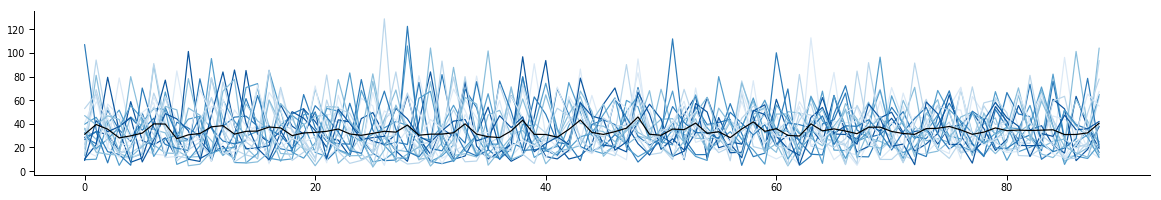

In [68]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
sns.set_context('paper', font_scale=1.1)
#sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
#palette = sns.choose_colorbrewer_palette('sequential');
sns.set_palette("Blues")
with sns.axes_style("ticks"):
    ax.plot(reps_curvs[:,:])
    ax.plot(reps_curvs.mean(axis=1),'k')
sns.despine(trim=False)

In [65]:
reps_curvs.mean()

21.672900161458067

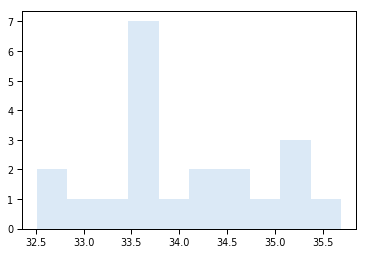

In [60]:
plt.hist(reps_curvs.mean(axis=0));

In [61]:
reps_curvs.mean(axis=0)

array([33.62424 , 35.350834, 33.531887, 33.6559  , 33.41888 , 33.83116 ,
       32.510628, 32.978153, 34.741177, 34.478092, 34.25717 , 33.542236,
       35.695385, 34.487778, 33.4752  , 33.533283, 35.13756 , 34.232895,
       35.07031 , 33.60238 , 32.77119 ], dtype=float32)